<hr>
<div style="background-color: lightgray; padding: 20px; color: black;">
<div>
<img src="https://th.bing.com/th/id/R.3cd1c8dc996c5616cf6e65e20b6bf586?rik=09aaLyk4hfbBiQ&riu=http%3a%2f%2fcidics.uanl.mx%2fwp-content%2fuploads%2f2016%2f09%2fcimat.png&ehk=%2b0brgMUkA2BND22ixwLZheQrrOoYLO3o5cMRqsBOrlY%3d&risl=&pid=ImgRaw&r=0" style="float: right; margin-right: 30px;" width="200"/> 
<font size="6.5" color="8C3061"><b>Muestreo de una Distribución</b></font> <br>
<font size="5.5" color="8C3061"><b>Problemas Inversos - Tarea 3 </b></font> 
</div>
<div style="text-align: left">  <br>
Edison David Serrano Cárdenas. <br>
MSc en Matemáticas Aplicadas <br>
CIMAT - Sede Guanajuato <br>
</div>

</div>
<hr>


*Cargar librerias:*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import corner
import seaborn as sns
sns.set_theme(style="whitegrid")
np.random.seed(2025)


from forward_mapping import Forward_mapping

# <font color="8C3061" >**Metropolis-Hastings**</font> 

Constantes:

In [2]:
gammas = [0.001, 0.05, 0.1, 1]
sample_size = 10000
burnin = 5000

Valor inicial para el mcmc:

In [3]:
x0 = np.zeros(2)
x0[0] = np.random.uniform(-2, 2)
x0[1] = np.random.uniform(-1, 2)
print("Punto inicial:",x0)

Punto inicial: [-1.45804735  1.66355511]


## <font color="8C3061" >**Simulación del Algoritmo:**</font> 

In [4]:
chains = []
energies = []
acceptance_rates = []

In [5]:
fm = Forward_mapping(sample_size= sample_size)

In [6]:
for gamma in gammas:
    chain, energy, acc_rate = fm.mcmc_normal_proposal(x0, gamma)
    chains.append(chain[burnin:])
    energies.append(energy[burnin:])
    acceptance_rates.append(acc_rate)

### <font color="8C3061" >**Gráficas de la trazas:**</font> 

In [7]:
xx_iter = np.arange(burnin, sample_size)

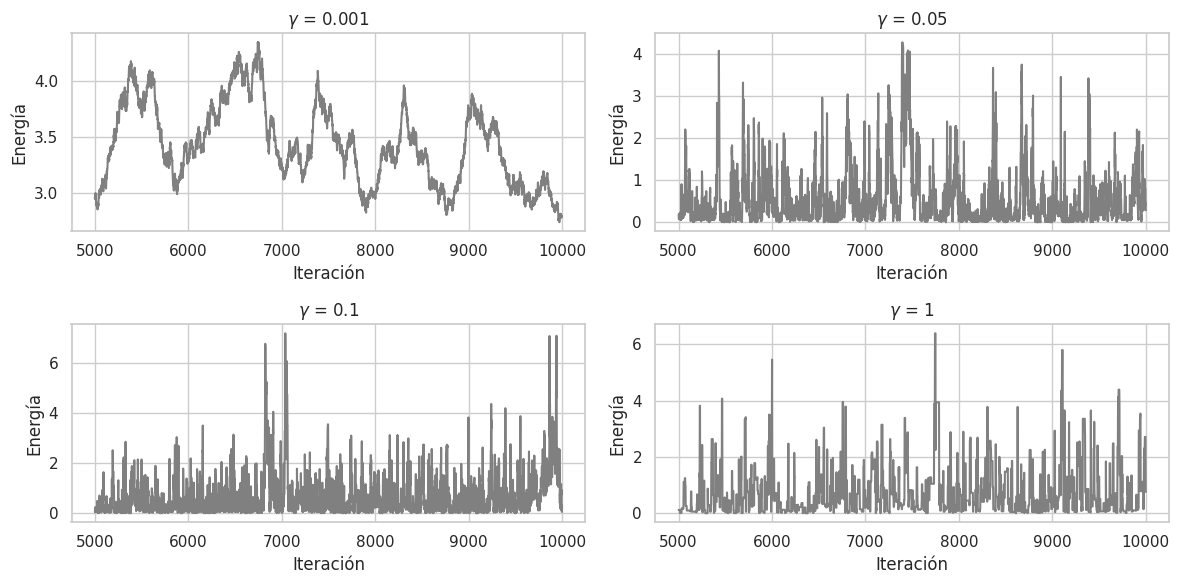

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(12,6))

axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.plot(xx_iter, energies[i], color="gray")
    ax.set_title(r"$\gamma$ = "+f"{gammas[i]}")
    ax.set_xlabel("Iteración")
    ax.set_ylabel("Energía")

plt.tight_layout()
plt.savefig("mcmc_trace.pdf")
plt.show()

### <font color="8C3061" >**Gráficas de las Districiones Generadas:**</font> 

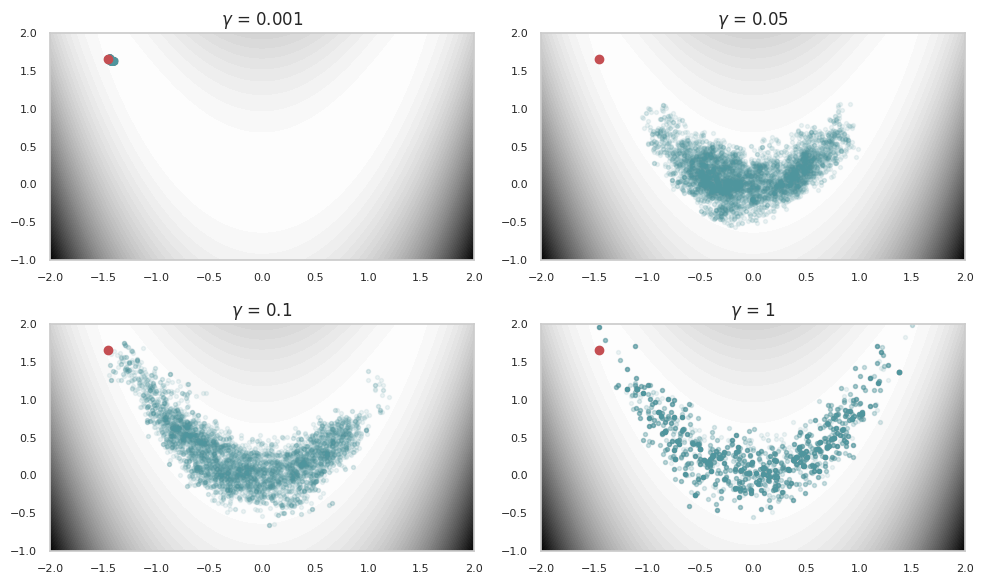

In [20]:
# Meshgrid
X, Y = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-1, 2, 100))
Z = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i,j] = fm.energy([X[i,j], Y[i,j]])

# Plot the distribution with the samples
fig, axes = plt.subplots(2, 2, figsize=(10,6))

axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.contourf(X, Y, Z, 50, cmap='binary')
    ax.scatter(chains[i][:,0], chains[i][:,1], alpha=0.1, color="#4F959D", s=8)
    ax.set_title(r"$\gamma$ = "+f"{gammas[i]}")
    ax.grid(False)
    ax.set_ylim(bottom=-1,top=2)
    ax.plot([x0[0]], [x0[1]], 'ro')
    ax.tick_params(axis='both', labelsize=8)

plt.tight_layout()

plt.savefig("Metropolis.png")
plt.show()

In [10]:
for i in range(len(acceptance_rates)):
    print("Gamma: ", gammas[i], "\tTasa de aceptación: ", acceptance_rates[i])

Gamma:  0.001 	Tasa de aceptación:  0.9898
Gamma:  0.05 	Tasa de aceptación:  0.8833
Gamma:  0.1 	Tasa de aceptación:  0.7826
Gamma:  1 	Tasa de aceptación:  0.16


In [11]:
def corner_plot(figsize,
                estimated_points, 
                labels_estimated,
                colors_estimated,
                chains, 
                plot_estimated,
                grid,
                save_name=None):
    
    ndim = chains.shape[1]
    fig= plt.figure(figsize=figsize)
    
    
    params_corner = {
        "data": chains,
        "labels": [r"$x_1$", r"$x_2$"],
        "color": "#4F959D",
        "hist_bin_factor": 2,
        "smooth": 0.8,
        "plot_datapoints": True,
        "plot_density": True,
        "plot_contours": True,
        "max_n_ticks": 6,
        "label_kwargs": {"fontsize": 14},
        "title_kwargs": {"fontsize": 12},
        "show_titles": True,
        "title_kwargs": {"fontsize": 12},
        "hist_kwargs": {"histtype":'stepfilled',"alpha":0.4}
    }
    corner.corner(**params_corner, fig=fig)
    axes = np.array(fig.axes).reshape((2,2))
    if plot_estimated:
        for i in range(ndim):
            ax = axes[i,i]
            for j in range(len(estimated_points)):
                ax.axvline(estimated_points[j][i], color=colors_estimated[j], linestyle="-", label=labels_estimated[j])
                
    for i in range(ndim):
        for j in range(i):
            ax = axes[i,j]
            ax.grid(grid)
            if plot_estimated:
                for k in range(len(estimated_points)):
                    ax.plot(estimated_points[k][j], estimated_points[k][i], 's', color=colors_estimated[k], label=labels_estimated[k])
                    ax.axhline(estimated_points[k][i], color=colors_estimated[k], linestyle="-")
                    ax.axvline(estimated_points[k][j], color=colors_estimated[k], linestyle="-")
    for i in range(2):
        ax = axes[i,i]
        ax.grid(grid)
    
    if plot_estimated:
        handles, labels = axes[0, 0].get_legend_handles_labels()
        fig.legend(handles, labels, loc='upper right', fontsize=12)
    
    if save_name is not None:
        plt.savefig(save_name)
    
    plt.show()
    

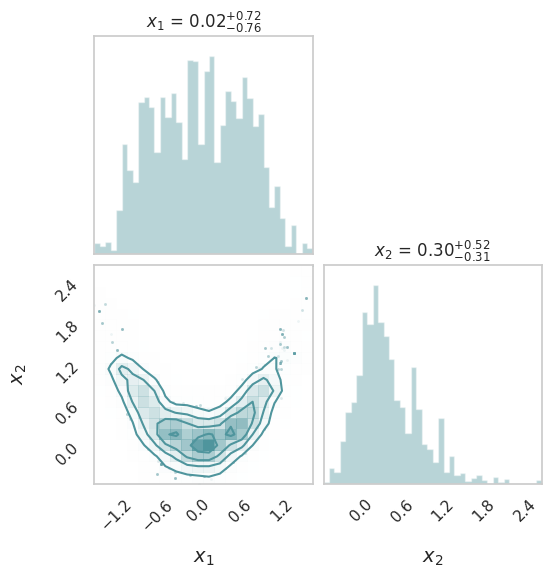

In [12]:
max_val = chains[3][np.argmin(energies[3])]
estimated_points =[max_val]
labels_estimated = ["MAP"]
colors_estimated = ["blue","red"]

corner_plot(figsize=(6,6),
            estimated_points=estimated_points, 
            labels_estimated=labels_estimated, 
            colors_estimated=colors_estimated,
            plot_estimated=False,
            chains=chains[3],
            grid=False,
            save_name="corner_plot_3.pdf")

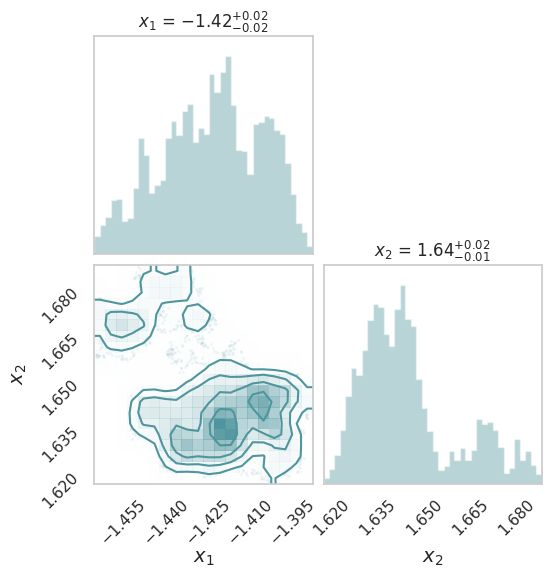

In [13]:
corner_plot(figsize=(6,6),
            estimated_points=[],
            labels_estimated=[],
            colors_estimated=[],
            plot_estimated=False,
            chains=chains[0],
            grid=False,
            save_name="corner_plot_1.pdf")

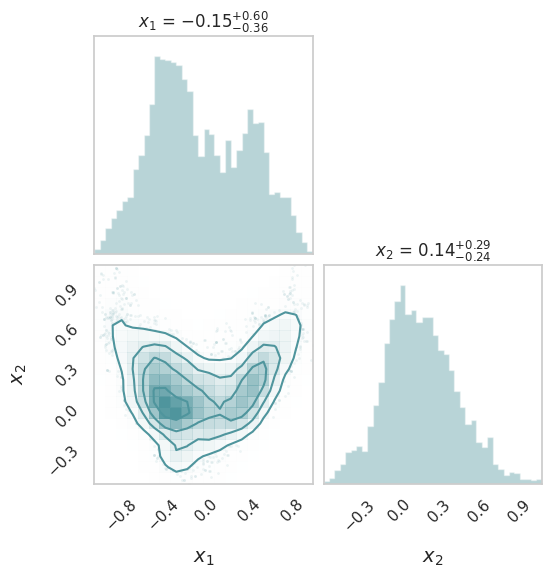

In [14]:
corner_plot(figsize=(6,6),
            estimated_points=[],
            labels_estimated=[],
            colors_estimated=[],
            plot_estimated=False,
            chains=chains[1],
            grid=False,
            save_name="corner_plot_2.pdf")

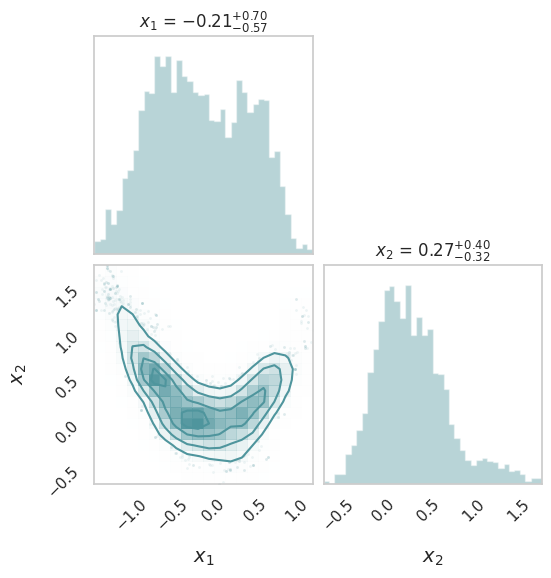

In [15]:
corner_plot(figsize=(6,6),
            estimated_points=[],
            labels_estimated=[],
            colors_estimated=[],
            plot_estimated=False,
            chains=chains[2],
            grid=False,
            save_name="corner_plot_3.pdf")

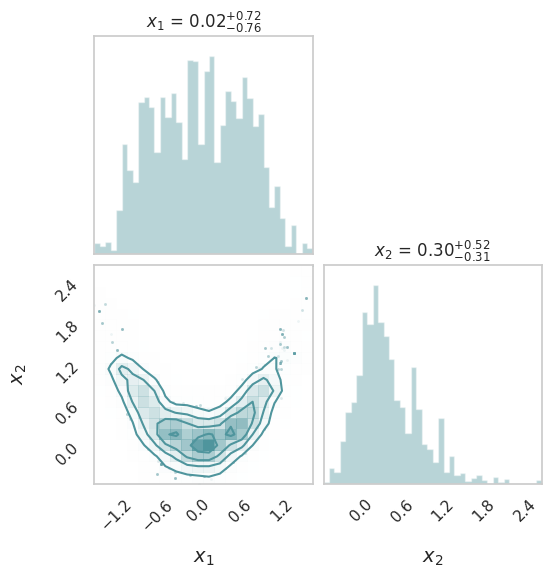

In [16]:
corner_plot(figsize=(6,6),
            estimated_points=[],
            labels_estimated=[],
            colors_estimated=[],
            plot_estimated=False,
            chains=chains[3],
            grid=False,
            save_name="corner_plot_4.pdf")

<font color="8C3061" >**Simulación con T-walk:**</font> 

In [17]:
dist_mcmc = fm.run_twalk()

Initial states t-walk:  [-1.60092315 -0.7087872 ] ,  [1.22003105 0.51889906]
pytwalk: Running the twalk to 10000 iterations .  Fri, 21 Mar 2025, 19:30:37.
        
pytwalk: finished, 10000 iterations.
Fri, 21 Mar 2025, 19:30:39.


Acceptance rates for the Walk, Traverse, Blow and Hop kernels:[0.38074044 0.15720702 0.21794872 0.4691358 ]
Global acceptance rate: 0.27070
AutoMaxlag: maxlag= 78.
Integrated Autocorrelation Time: 44, IAT/n:    22.0


44

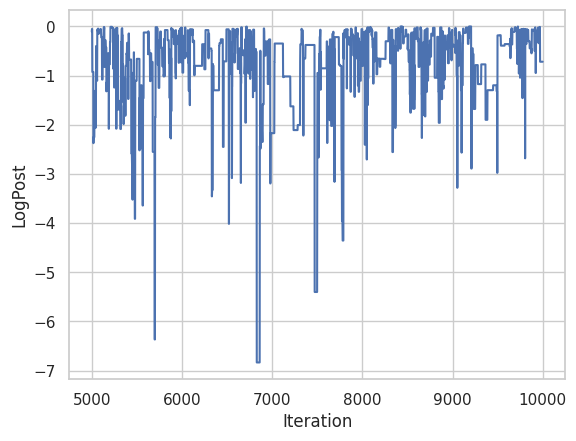

In [18]:
dist_mcmc.Ana(start=burnin)

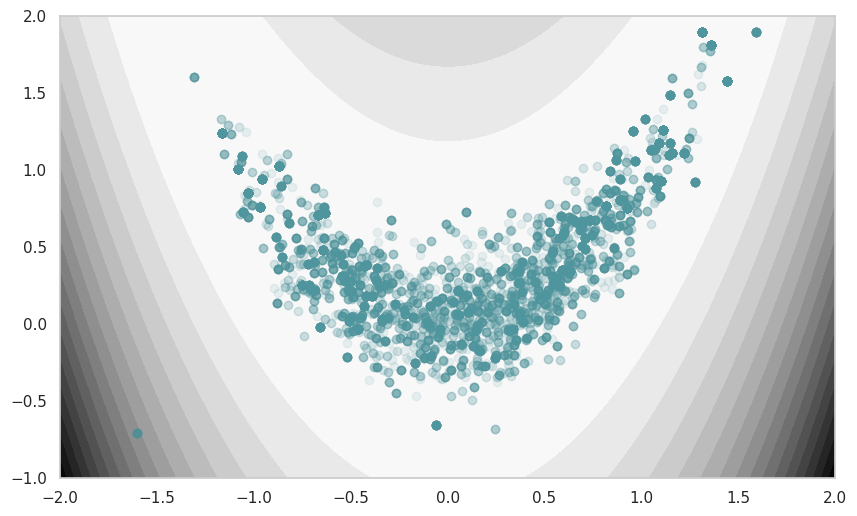

In [19]:
plt.figure(figsize=(10,6))
plt.contourf(X, Y, Z, 20, cmap='binary')
plt.scatter(dist_mcmc.Output[:,0],dist_mcmc.Output[:,1], alpha=0.1, color="#4F959D")
plt.grid(False)